In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Haxton/pixel_values.csv')
df = df[df['CV'] > 0]
df = df[df['Mean'] > 0]
df.head()

,X,Y,Mean,CV
589,-102.675080,40.609456,0.394897,7.885674
590,-102.675064,40.609456,0.392954,9.330218
591,-102.675048,40.609456,0.390964,11.106678
592,-102.675032,40.609456,0.394873,11.999508
593,-102.675016,40.609456,0.405310,10.942461


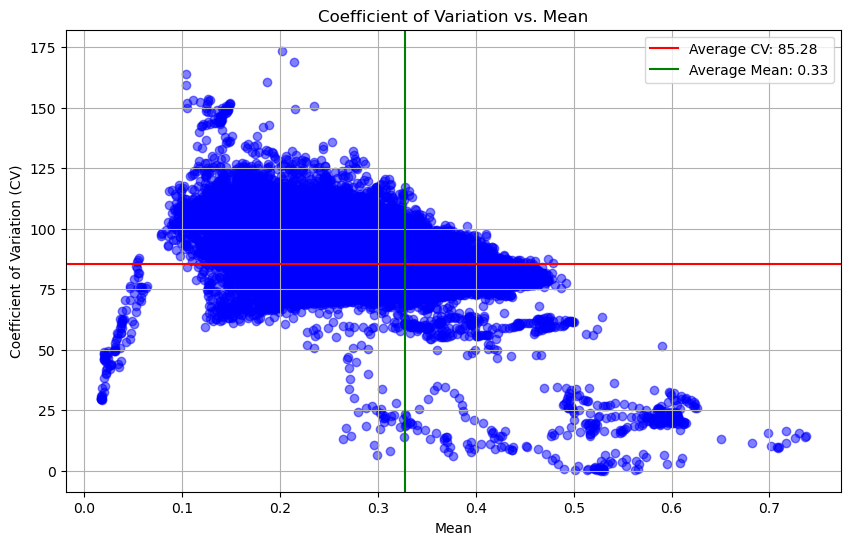

In [10]:
# Calculate average CV and Mean
average_cv = df['CV'].mean()
average_mean = df['Mean'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Mean'], df['CV'], color='blue', alpha=0.5)
plt.axhline(y=average_cv, color='r', linestyle='-', label=f'Average CV: {average_cv:.2f}')
plt.axvline(x=average_mean, color='g', linestyle='-', label=f'Average Mean: {average_mean:.2f}')
plt.title('Coefficient of Variation vs. Mean')
plt.xlabel('Mean')
plt.ylabel('Coefficient of Variation (CV)')
plt.legend()
plt.grid(True)

In [11]:
# Calculate average CV and Mean
average_cv = df['CV'].mean()
average_mean = df['Mean'].mean()

# Function to classify each row
def classify_zone(row, avg_cv, avg_mean):
    if row['Mean'] > avg_mean and row['CV'] > avg_cv:
        return 'B'
    elif row['Mean'] < avg_mean and row['CV'] < avg_cv:
        return 'D'
    elif row['Mean'] < avg_mean and row['CV'] > avg_cv:
        return 'B'
    else:
        return 'C'

# Apply the classification function to each row
df['Zone'] = df.apply(classify_zone, axis=1, args=(average_cv, average_mean))

# Display the updated DataFrame
df.head()

,X,Y,Mean,CV,Zone
589,-102.675080,40.609456,0.394897,7.885674,C
590,-102.675064,40.609456,0.392954,9.330218,C
591,-102.675048,40.609456,0.390964,11.106678,C
592,-102.675032,40.609456,0.394873,11.999508,C
593,-102.675016,40.609456,0.405310,10.942461,C


In [12]:
df.to_csv('../Haxton/pixel_values_classified.csv')